__¿CUÁL ES LA PROBABILIDAD DE QUE LA SUMA O PRODUCTO DE LOS RESULTADOS DE $N$ DADOS SEA $=,~ <, ~ \le,~>,~\ge~$  Ó MÚLTIPLO DE UN NÚMERO ENTERO $z~$?__

$~~~~~~~~~~~~~~~~~~~~~~$__Autor: Luis Jiménez__

$~~~~~~~~~~~~~~~~~~~~~~~~~~$Marzo-2023
$~~~~~~~~~~~~~~~~~~~~~~~~~~$Versión 1.0

__Resumen:__ 

En este mini-proyecto se calcula la probabilidad de que la suma o producto $Z$ de los resultados aleatorios discretos $[X_1,X_2,...,X_N]$ de $N$ dados sea $=,~ <, ~ \le,~>,~\ge$ ó múltiplo de un número entero $z$. Para esto, se edita una clase en Python-3.9 que calcula la probabilidad utilizando dos métodos que aplican "la fuerza bruta", el primero es el método de Montecarlo (MC) que se basa en la generación de resultados con números pseudo-aleatorios y el segundo es el Producto Cartesiano (CP) barriendo con todas las combinaciones posibles de los dados (en este último, proporciona el valor exacto de la probabilidad). Con esta clase también se puede calcular y graficar la Función de Masa de Probabilidad (PMF) definida por $f[z]=\mathbb{P}(Z=z)$ y la Función de Distribución Cumulativa (CDF) definida por $F[z]=\mathbb{P}(Z \le z)$ y calcula su respectivo valor esperado $\mathbb{E}(Z)$ y la varianza $\operatorname{Var}(Z)$. Se comparan ambos métodos en cuanto a tiempo de ejecución y la precisión del método de Montecarlo. Se concluye que el tiempo de ejecución del método CP es exponencial, mientras que el tiempo de ejecución del método MC es aproximadamente constante. El método CP tiene un menor tiempo de ejecución que el método MC para un número de dados menor que 7-8, mientras que para un número de dados mayor que 8 es mejor utilizar el método de MC. Finalmente, el método de MC con un número de juegos de 50000 produce resultados bastante satisfactorios con una pérdida despreciable de precisión, calculando la probabilidad del evento con un error relativo entre 0.1%-1%.

__Keywords:__ dados, probabilidades, método de Montecarlo, producto cartesiano, python.


______________________________________________
__Disclaimer:__ El  autor (yo, Luis Jiménez) dediqué
mi mejor  esfuerzo  para  entregar   unos códigos de python  que  fueron   probados cuidadosamente  arrojando   resultados  correctos  para  un  amplio   rango  de  valores  de  entrada,   sin embargo,  debido  a  que  estos   scripts pueden no estar completamente libre  de  errores,  te  recomiendo   verificar  tu  trabajo  en  caso  de   inconsistencia  en  algún  resultado.   El  autor NO se  hace responsable  por  cualquier  daño que  puede  resultar  de  errores,   omisión  de  información  y  cualquier   valor  inexacto  producido  por  el uso  de  este programa. Este código viene sin  garantía. Por favor, úsalo bajo tu  propio riesgo. El objetivo de este  trabajo no es precisamente una  publicación académica o un proyecto corporativo, sólo es elaborado con fines educativos e instructivos, diversión o entretenimiento, por lo que NO pretendo  ser formal en el formato del código ni en la edición de los comentarios del mismo, así que NO seguiré las normas estandarizadas ni  convenios para elaborar código fuente en
Python.
Es completamente gratuito y de libre
distribución.
______________________________________________

__1. INTRODUCCIÓN:__

Los dados son uno de los objetos más antiguos que se han utilizado para generar números aleatorios discretos, porque su dinámica es completamente caótica y prácticamente estocástica, a pesar que de que su representación mediante las ecuaciones de mecánica clásica puedan explicarse de forma 100% determinista. Hay demasiadas variables que hacen que un lanzamiento de dados sea un evento completamente aleatorio ya que las condiciones iniciales están gobernadas por valores aleatorios, en primer lugar, el lanzamiento de un solo dado depende fuertemente de las condiciones iniciales tales como vector de posición, vector de velocidad de traslación y vector de velocidad angular, respectivamente denotados mediante $\mathbf{\vec{r}(0),~\vec{v}(0),~\vec{\theta}(0),~\vec{\omega}(0)}$, y como este lanzamiento es efectuado en tres dimensiones espaciales $\mathbf{\vec{r},\vec{\theta}}:\mathbb{R}^3\rightarrow\mathbb{R}^3$, entonces en $t=0$ (inicialmente) se tienen 12 grados de libertad (3 por cada vector inicial). Hasta aquí, estos doce parámetros se pueden manipular con un robot, pero un humano es incapaz de replicar el mismo lanzamiento dos veces, así que estas condiciones iniciales son aleatorias en la práctica. Además, si se añade al vector de velocidad inicial del viento $\mathbf{\vec{v}_w}(0)$, entonces los grados de libertad ascienden a 15 variables. Luego del lanzamiento, en $t>0$ sólo es afectado por la fuerza ejercida por la aceleración de la gravedad y la fuerza de roce con el viento (la velocidad del viento como función del tiempo es un vector completamente estocástico), así que los vectores de la dinámica del dado $(\mathbf{r,\dot{r},\theta,\dot{\theta}})(t)$ también tienen componentes aleatorios y finalmente cuando choque en una superficie plana, dependerá del coeficiente de ley de Hooke (ley que hacen que los materiales se comporten como resortes) y de fricción dinámica cuando los vértices y aristas choquen con el suelo, que añade aún más componentes aleatorios al sistema dinámico. Dicho esto, el lanzamiento de un simple objeto como un dado es un evento prácticamente aleatorio. No se conoce con exactitud cuando y por quienes fueron creados estos pequeños artefactos, sin embargo se data que fue alrededor de unos 3000 años B.C. $\color{blue}{^{[1]}}$, pero realmente se desconoce que fecha fueron creados por primera vez. 

Un dado es cualquier sólido que tenga forma de poliedro (un sólido cuyas que tiene caras planas llamadas polígonos), sin embargo, nos interesan más los que tienen distribución de masa uniforme (completamente relleno de masa, sin huecos y que tengan densidad constante en todo su volumen) y que sean poliedros regulares, es decir, aquellos sólidos cuyas caras están compuestas del mismo polígono (en forma y en tamaño) y los ángulos son iguales en todos sus vértices. Sólo existen cinco (5) sólidos que satisfacen estas condiciones: el tetraedro (cuyas caras son 4 triángulos equiláteros), el cubo (6 cuadrados), el octaedro (8 triángulos equiláteros), el dodecaedro (12 pentágonos) y el icosaedro (20 triángulos equiláteros). Un ejemplo de dados basados en estos poliedros se muestran en la siguiente figura $\color{blue}{^{[2]}}$:

![dice](https://drive.google.com/uc?export=view&id=1RFijjtFk1vBWbXXnDFlFW2x6OUqxAPCE)

Los pitagóricos y Kepler sabían que sólo existen cinco poliedros regulares, sin embargo Descartes y Euler muchos siglos después (alrededor del año 1750) mostraron la siguiente relación entre los vértices ($V$), aristas ($E$) y caras ($F$)
$\color{blue}{^{[3]}}$:

$\displaystyle V-E+F=2~~~~~~~~~~~~~~~~~~~~~~~~~$ (1)

Aplicando la ecuación (1), por ejemplo, para el tetraedro $(V=4, E=6, F=4)$ se cumple que
$4-6+4=2$. Otro ejemplo, para el cubo $(V=8, E=12, F=6)$ se cumple que
$8-12+6=2$, y mediante la misma ecuación se muestra que sólo existen estos cinco poliedros regulares. Utilizando estos sólidos pitagóricos podrían ser una fuente confiable para generar variables aleatorias uniformes y discretas. Generalmente el resultado viene dado por la cara visible de arriba, pero en el caso del tetraedro, el resultado puede ser el de la base que descansa sobre el suelo o alternativamente se pueden escribir los números cerca de sus vértices (así se evita las ambigüedades). Sin embargo, no nos limitaremos a los cinco sólidos pitagóricos, un dado de dos caras podría ser una moneda y un dado de 37 ó 38 lados podría ser una ruleta europea o americana (dependiendo cuál versión sea, la primera  tiene 36 números, incluyendo el cero, y la otra tiene 36 números, el cero y el doble cero). La ruleta podría tener 11 resultados, no hay limitación mecánica para su diseño. La idea aquí es que llamemos "dado" a cualquier artefacto que genere números aleatorios discretos con distribución uniforme, ya sea analógico, o digital con un buen generador de números aleatorios.

Con todo lo anteriormente dicho, en este pequeño proyecto vamos a "jugar" a lanzar los dados y obtener resultados de ellos. El objetivo principal es calcular la probabilidad de que los resultados de los dados satisfaga una condición en específico. 
Sea $[n_1,n_2,...,n_N]$ un arreglo de dados, es decir, una lista de $N$ dados con un número de de $n_i$ caras cada uno ($i=1,2,...,N$). Cada dado genera una variable aleatoria discreta uniforme $X_i$ que puede tomar valores desde $1, 2,...,n_i$. 
Sea $Z$ una variable aleatoria discreta definida por

$\displaystyle Z=\sum_{i=1}^N X_i~~~~~~~~~~~~~~~~~~~~~~$(2a)

O también

$\displaystyle Z=\prod_{i=1}^N X_i~~~~~~~~~~~~~~~~~~~~~~$(2b)

Sea $z$ un valor entero que nosotros fijemos a priori (antes del experimento), deseamos construir un código que calcule las siguientes probabilidades:

$\displaystyle \mathbb{P}(Z=z)~~~~~~~~~~~~~~~~~~~~~~$(3a)

$\displaystyle \mathbb{P}(Z<z)~~~~~~~~~~~~~~~~~~~~~~$(3b)
$\displaystyle \mathbb{P}(Z \le z)~~~~~~~~~~~~~~~~~~~~~~$(3c)
$\displaystyle \mathbb{P}(Z>z)~~~~~~~~~~~~~~~~~~~~~~$(3d)
$\displaystyle \mathbb{P}(Z \ge z)~~~~~~~~~~~~~~~~~~~~~~$(3e)
$\displaystyle \mathbb{P}(Z \mbox{ es múltiplo de }z)~~~~~~~~~~~~~~~~~~~~~~$(3f)

Para esto, editamos unas funciones y clases en Python para automatizar los cálculos. También la clase podrá determinar su Función de Masa de Probabilidad (PMF), es decir $f[z]=\mathbb{P}(Z=z)$ y la Distribución Cumulativa de Probabilidad (CDF), $F[z]=\mathbb{P}(Z \le z)$, y se grafican y se tabulan los resultados. Para realizar los cálculos, se utilizan dos métodos basados en la "fuerza bruta", el primero es el método de Montecarlo (que utiliza miles o millones de números pseudoaleatorios) y el método del producto cartesiano que consiste en barrer con todo el espacio muestral discreto y hallar el 100% de de las combinaciones, y de estas combinaciones se seleccionan las que satisfacen "la condición en específico que se desea que se verifique". Un objetivo secundario es realizar varios ejercicios prácticos y finalmente comparar ambos métodos en cuanto a la precisión del método de Montecarlo y el tiempo de ejecución de ambos métodos y finalmente se analizan los resultados.

__Versión de Python utilizada:__
Para conocer la versión de python utilizada en este Jupyter Notebook se pueden usar cualquiera de las siguientes instrucciones:

In [1]:
import sys
print(sys.version)

3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


In [2]:
!python -V

Python 3.9.16


__Librerías:__ numpy (https://numpy.org/), itertools (únicamente la función itertools.product()), matplotlib (https://matplotlib.org/), pandas (https://pandas.pydata.org/), time.

In [ ]:
"""
Si no tienes instaladas ninguna de estas
librerías, ejecutar este bloque de código
"""
!pip install numpy
!pip install matplotlib
!pip install pandas

__2. MÉTODO DE MONTECARLO (método #1)__: 

Aquí elaboramos un código simple aplicando el método de Montecarlo usando la librería __numpy__ para generar números enteros pseudo-aleatorios.

Como ejemplo práctico para este caso, resolvemos el problema de la "suma de los resultados de tres dados sea múltiplo de tres" resuelta por Simón Graffe en Quora, en el que él compartió un código equivalente en lenguaje C $\color{blue}{^{[4]}}$. En los comentarios al principio se explican paso a paso todas las funciones e instrucciones utilizadas para elaborar esta simple pieza de código en python.

In [3]:

"""
Abstract: en este script de python 
resolvemos el problema de la probabilidad 
de lanzar "nd" dados, cuya suma de los
resultados de todos los dados sea 
múltiplo de "Mul", resuelta por
Simón Graffe en Quora, donde él
compartió un código en C [referencia 4] para 
el caso particular de tres dados 
convencionales de 6 lados enumerados del
1 al 6, y se desea calcular la 
probabilidad cuya suma sea múltiplo de 3. 
En este caso, resolvemos este problema
con el método de Montecarlo mediante la 
generación de números enteros 
pseudoaleatorios.

Librerías y sus métodos utilizados: sólo 
usamos la popular librería
numpy para vectorización/matrices y 
generar números pseudoaleatorios. 
La librería numpy además puede manejar 
números complejos, polinomios y esta 
clase de objetos. La versión utilizada
de esta librería es la '1.21.6'
obtenida con la instrucción:

import numpy as np
np.__version__
retorna '1.21.6'

De esta librería utilizamos sólo DOS (2) 
funciones descritas a continuacion:

    numpy.array(list, dtype): es 
         utilizado para definir un 
         vector. Los argumentos son: 
         list = lista de valores 
                [x, y, z, ...]
         dtype = es el tipo de dato de la
                 lista. Es una 
                 declaración del tipo de
                 dato de las variables 
                 que están dentro de la 
                 lista. En caso que sean 
                 "enteros", declaramos 
                 como 'int'.

    numpy.random.randint(low, high, size): 
         sirve para generar valores 
         pseudoaleatorios enteros con
         distribución uniforme en el 
         intervalo [low, high).
         Nótese que 'low' es INCLUSIVE, 
         y 'high' es EXCLUSIVE.
         Los argumentos son:
         low = es el valor entero mínimo
               de la distribución
         high = es el valor entero máximo 
                (no se incluye dentro
                de la distribución y por
                esto hay que agregar + 1)
         size = es una tupla (n, m) para 
                indicar que queremos
                una matriz de números 
                pseudoaleatorios n x m
                (es opcional).

Aparte de estas funciones, utilizamos 
algunas instrucciones que tiene python-3 
por defecto:
     int(x): para declarar/convertir un 
             valor x en entero.

     len(x): para buscar la longitud del 
             arreglo, por ejemplo
             len([1,2,3,5]) tiene como 
             resultado 4.

     range(start, stop, step): secuencia 
             de valores que empiezan 
             en 'start' (INCLUSIVE) y 
             terminan en 'stop' 
             (EXCLUSIVE). En este sentido
             se obtiene una secuencia de 
             números enteros [start,stop)
             Casi todo en Python tiene
             este formato, hay que leer
             muy bien la documentación
             para ver si el límite 
             superior del intervalo es 
             inclusive.
             Si se omite 'step' se 
             toma "1" como valor por 
             defecto, es decir, la 
             secuencia va de uno en uno.

     sum(x): sumar todos los elementos 
             del arreglo.

     %: es el operador del residuo de la 
             división euclidea, X % Y.

     ==: para verificar que X==Y. En caso 
             que la comparación sea punto
             flotante (números reales) es
             mejor utilizar 
             abs(X - Y) < tol, donde 
             'tol' es una tolerancia,
             un valor pequeño arbitrario.

     +=: es equivalente a i = i + x. 
             Si es i += 1 es lo mismo que 
             i++ usado en otros lenguajes
             de programación como C++.

     *=: es equivalente a p = p*x.

     print(s): imprime un resultado en 
             diferentes formatos.

     Otros: '\': no hace nada. Sólo sirve
                 para continuar la 
                 expresión en la 
                 siguiente línea.
            '#': escribir UNA línea de
                 comentario.
            Triple doble comillas: para 
                 escribir comentarios 
                 también.
"""

# importar librerías
import numpy as np

#número de simulaciones de Montecarlo 
N = 1e6      # (e.g. un millón)
N_games = int(N)

#número de lados en cada uno de los dados
#  escribimos [n_1, n_2,...,n_nd], 
# "nd" dados de "n_i" lados cada uno
dices_array = np.array([6, 6, 6], 
                        dtype=int)
# definimos el múltiplo que deseamos,
# cuya suma de resultados sea multiplo
# de 'Mul'
Mul = 3

# se registran los aciertos usando este 
# contador
index = 0

for i in range(N_games):
    # se genera el array [X1,X2,..,X_nd]
    # de números pseudo-aleatorios
    # de los resultados de los dados
    dice_results_i = \
        np.random.randint(low=1, 
                    high=dices_array+1)

    # se verifica si la suma de los 
    # resultados es múltiplo de "Mul"
    #  y se registra en +1 el acierto
    if (sum(dice_results_i) % Mul)==0:
        index += 1

probability = index/N_games
print("the probability is: %.5f" 
      % probability)

the probability is: 0.33375



__3. PRODUCTO CARTESIANO (Método #2):__

__3.1. Utilizando tres ciclos FOR anidados:__

En el siguiente script usamos tres ciclos FOR con tres contadores para barrer con todo el espacio muestral usando la fuerza bruta determimista (producto cartesiano), a diferencia del anterior no utilizamos números pseudoaleatorios, es decir usamos: 

For $i$ from 1 to $n_1$:   

$~~~~$For $j$ from 1 to $n_2$:

$~~~~~~~~$For $k$ from 1 to $n_3$:

Verificar que $i+j+k$ es múltiplo de $Mul$

Aquí no utilizamos ninguna librería, pero está limitado a sólo TRES DADOS. Si se quiere añadir un cuarto dado hay que agregar otro ciclo FOR con otro nuevo contador.

In [4]:
# núm. de lados en cada uno de los dados
#  escribimos [n_1, n_2, n_3], tres dados 
#  de n_i lados cada uno
dices_array = [6, 6, 6]

#definimos el múltiplo que deseamos, 
Mul = 3

#se registran los aciertos usando este 
# contador
index = 0

# usamos tres ciclos FOR para barrer 
# con todo el espacio muestral y 
# encontrar todas las combinaciones cuya
# suma sea múltiplo de "Mul"
for i in range(1, dices_array[0]+1):  
    for j in range(1, dices_array[1]+1): 
        for k in range( 
                   1, dices_array[2]+1):
            s = i + j + k      
            if (s % Mul == 0):               
                index += 1

# función para calcular el producto de 
# de todos los elementos de un array
def prod(x, p=1):
    for x_i in x: p *= x_i 
    return p

# todas las combinaciones es simplemente
# el producto n1*n2*n3 y usamos prod()
nAllCombinations = prod(dices_array)
probability = index/nAllCombinations
print("the probability is: %.8f" 
      % probability)

the probability is: 0.33333333


El siguiente script es completamente equivalente al anterior, pero utilizando '_list comprehensions_' en lugar de la sintaxis tradicional

In [5]:
# núm. de lados en cada uno de los dados
#  escribimos [n_1, n_2, n_3], tres dados 
#  de n_i lados cada uno
dices_array = [6, 6, 6]

#definimos el múltiplo que deseamos, 
Mul = 3

#se registran los aciertos usando este 
# contador
index = 0

# usamos tres ciclos FOR para barrer 
# con todo el espacio muestral y 
# encontrar todas las combinaciones cuya
# suma sea múltiplo de "Mul"
tuples = [(i,j,k) for i in \
    range(1, dices_array[0]+1) \
    for j in range(1, dices_array[1]+1) \
    for k in range(1, dices_array[2]+1)]

for dice_results in tuples:
    if sum(dice_results) % Mul == 0: 
       index += 1

# función para calcular el producto de 
# de todos los elementos de un array
def prod(x, p=1):
    for x_i in x: p *= x_i 
    return p

# todas las combinaciones es simplemente
# el producto n1*n2*n3 y usamos prod()
nAllCombinations = prod(dices_array)
probability = index/nAllCombinations
print("the probability is: %.8f" 
      % probability)

the probability is: 0.33333333


__3.2. Método del producto cartesiano usando la librería itertools__: 

En el siguiente código se resuelve el problema de los ciclos FOR anidados que se presentaron en los dos scripts anteriores usando la librería __itertools__ $\color{blue}{^{[5,~6]}}$ que proporciona la función products() que determina el producto cartesiano de varias listas $\mathbf{X_1 \times X_2\times\cdots\times X_n}$ , así que se puede usar cualquier cantidad de $N$ dados en lugar de tres dados y barrer todas las combinaciones posibles para $N$ dados. Esta librería es especial para realizar combinaciones, permutaciones y cualquier objeto que requiera  ciclos FOR recursivos o "_nested_ FOR _loops_".

In [6]:

"""
Abstract: en este script de python 
resolvemos el problema de la probabilidad
de lanzar "nd" dados, cuya suma de los
resultados de todos los dados sea 
múltiplo de "Mul" resuelto de una forma 
diferente al método de Montecarlo 
elaborado anteriormente. En este caso, 
se resuelve de forma 100% determinista 
(sin usar números pseudoaleatorios) 
utilizando el producto cartesiano 
proporcionado por la librería de python 
itertools.

Librerías y sus métodos utilizados: aquí 
sólo usamos la librería
itertools usada para ciclos FOR anidados
(FOR recursivos o "nested FOR-loops"), 
iteradores, métodos de conteo, 
combinatoria (permutaciones, 
productos cartesianos, etc). Python-3 
viene con esta librería por defecto, 
pero en caso que no se tenga instalada, 
por favor utilizar la instrucción:
!pip install itertools

De esta librería utilizamos sólo UNA (1) 
función descrita a continuacion:

    itertools.product(X1, X2,...,X_n): 
         es utilizado para encontrar 
         el producto cartesiano de varias
         listas:
         X1 x X2 x X3 x ... x X_n. 
         Los argumentos obligatorios son
         X1, X2,..., X_n (listas X_i)
         por ejemplo
         CPROD = list(product([1,2],
                      [1,2,3]) )   
         también puede ser           
         CPROD = list(product(*[[1,2],
                      [1,2,3]]) )   
         (ambos producen el mismo 
         resultado).      
         Este retorna una lista de tuplas         
         con el producto cartesiano de         
         todas las combinaciones posibles
             [(1, 1), (1, 2), (1, 3), 
              (2, 1), (2, 2), (2, 3)]
         Incluso se pueden usar cadenas 
         de caracteres (letras, nombres,
         etc) y funciona de la misma 
         manera.

Aparte de esta función, utilizamos 
algunas instrucciones que tiene python-3 
por defecto:
     list(x): convertir/mutar "x" o
             secuencia range() en una
             lista [x1, x2, ..., x_n].
             Ejemplo #1: 
             list({1, 2, 3})
             retorna [1, 2, 3]

             Ejemplo #2: tuplas
             list((1, 2, 3))
             retorna [1, 2, 3]

             Ejemplo #3: caracteres
             list("ABC")
             retorna ['A', 'B', 'C']

             Ejemplo #4:secuencia range()
             list(range(4)) 
             retorna [0, 1, 2, 3]

     *: operador para deshacer o 
             "desempacar" objetos 
             iterables como listas [...]
             , sets {...} o tuplas 
             (...). Es decir, "elimina"
             los corchetes, llaves o 
             paréntesis. Es conocido como
             "unpacking operator". Su
             utilización se entiende 
             mejor con los siguientes 
             ejemplos:

             Ejemplo #1: pasar argumentos
                         a funciones
             def f(x,y,z): return x+2*y+z
             luego
             f(*{1,2,3}) ó f(*[1,2,3])
             retorna 8 como resultado.
             Es lo mismo que f(1, 2, 3)

             Ejemplo #2: eliminar [],(),
                         {}
             X = [*(1,2,3),*{4,5}]
             retorna como resultado
                [1, 2, 3, 4, 5]

             Si no se hubiese usado el 
             operador "*" quedaría como
             una lista que contiene dos
             objetos: la tupla (1,2,3) y
             el set {4,5}:
             X = [(1,2,3),{4,5}]
             X[0] retorna (1,2,3)
             X[1] retorna {4,5}
             (recomiendo encarecidamente
             que prueben los resultados
             de todos estos ejemplos
             ustedes mismos, para 
             familiarizarse con este 
             operador que es muy útil)

     X.append(Y): método utilizado para
             aplicar al objeto "list" 
             para añadir la variable "Y"
             al final de la lista. 
             Por ejemplo:
             X = []
             X.append(1)
             Entonces X = [1]
             X.append(2)
             Entonces X = [1, 2]

     len(x): para buscar la longitud del 
             arreglo, por ejemplo
             len([1,2,3,5]) tiene como 
             resultado 4.

     range(start, stop, step): secuencia 
             de valores que empiezan 
             en 'start' (INCLUSIVE) y 
             terminan en 'stop' 
             (EXCLUSIVE). En este sentido
             se obtiene una secuencia de 
             números enteros [start,stop)
             Casi todo en Python tiene
             este formato, hay que leer
             muy bien la documentación
             para ver si el límite 
             superior del intervalo es 
             inclusive.
             Si se omite 'step' se 
             toma "1" como valor por 
             defecto, es decir, la 
             secuencia va de uno en uno.

     sum(x): sumar todos los elementos 
             del arreglo.

     %: es el operador del residuo de la 
             división euclidea, X % Y.

     ==: para verificar que X==Y. En caso 
             que la comparación

     +=: es equivalente a i = i + x. 
             Si es i += 1 es lo mismo que 
             i++ usado en otros lenguajes
             de programación como C++.

     print(s): imprime un resultado en 
             diferentes formatos.

     Otros: '#': escribir UNA línea de
                 comentario.
            Triple doble comillas: para 
                 escribir comentarios 
                 también.
"""

# habilitar la siguiente linea si no
# se tiene itertools instalado:
# !pip install itertools

from itertools import product as \
                      cartesian_product
# retorna una lista de todas las
# tuplas usando la función product() 
# para encontrar el producto cartesiano

def throw_dices(dices_array, Mul): 
    # número de dados "nd"
    nd = len(dices_array)
    # inicializamos algunas variables
    index = 0
    X = []

    # primero, construir una lista de
    # listas de resultados posibles para
    # cada dado [[1,2,..,n1], [1,2,..,n2]
    #            ...[1,2,..,n_nd]] y la
    # llamamos "X"
    for i in range(nd):
        X.append(
          list(range(1,dices_array[i]+1))
                )   
    # luego hallar todas las tuplas del
    # producto cartesiano (arreglo de 
    # todas las tuplas de combinaciones 
    # posibles)
    cprod_array = \
             list(cartesian_product(*X))

    # el número total de combinaciones
    # debe ser la longitud de la lista
    # anterior y debe ser igual al 
    # producto n1*n2*...*n_nd
    nAllCombinations = len(cprod_array)

    # finalmente de todas las tuplas 
    # encontradas, registramos aquellas 
    # cuya suma sea múltiplo de "Mul"
    # y lo registramos en +1 en "index"
    for dice_results in cprod_array:
        s = sum(dice_results)  
        if (s % Mul == 0): index += 1    

    # la probabilidad es simplemente
    # todos los aciertos entre casos
    # totales
    probability = index/nAllCombinations
    return probability

probability = throw_dices([6, 6, 6], 3)
print("the probability is: %.8f" 
      % probability)

the probability is: 0.33333333



__4. EDICIÓN DE LA CLASE  $\textbf{ Definedices}$__

Una vez resuelto los dos problemas anteriores usando la fuerza bruta (método de Montecarlo y método determinista usando el producto cartesiano), se unifican ambos problemas mediante la elaboración de una clase que tiene varios métodos:

__(1) $\texttt{Definedices()}$__: el método constructor para crear una instancia de la clase. Tiene los siguientes parámetros:

$\color{blue}{\texttt{dices_array}}$  $\color{gray}{\textrm{[list, tuple, int]}}$: que es una lista o una tupla con todos los dados cuyos elementos son el número de caras de cada dado y por lo tanto es un número entero mayor que 1. Por ejemplo, la lista [4, 6, 8, 12, 20] contiene cinco dados con caras enumeradas desde el 1 hasta $n_i$ donde $n_i$ es cada elemento en la lista. Puede ser una lista [ ], tupla ( ) o un número entero (en este último caso es un sólo dado).

$\color{blue}{\texttt{rule}}$  $\color{gray}{\textrm{[str]}}$: la regla con que se va a verificar el resultado de los dados. Se admiten los siguientes:

__'sum='__: es la suma de todos los resultados de los dados (siendo cada resultado aleatorio denotado como $X_i$) es IGUAL a $z$, es decir $\sum_{i=1}^N X_i = z$.

__'sum<='__: es la suma de todos los resultados de los dados (siendo cada resultado aleatorio denotado como $X_i$) es MENOR O IGUAL a $z$, es decir $\sum_{i=1}^N X_i \le z$.

__'sum<'__: es la suma de todos los resultados de los dados (siendo cada resultado aleatorio denotado como $X_i$) es MENOR a $z$, es decir $\sum_{i=1}^N X_i < z$.

__'sum>='__: es la suma de todos los resultados de los dados (siendo cada resultado aleatorio denotado como $X_i$) es MAYOR O IGUAL a $z$, es decir $\sum_{i=1}^N X_i \ge z$.

__'sum>'__: es la suma de todos los resultados de los dados (siendo cada resultado aleatorio denotado como $X_i$) es MAYOR a $z$, es decir $\sum_{i=1}^N X_i > z$.

__'sum_multiple_of_'__: es la suma de todos los resultados de los dados (siendo cada resultado aleatorio denotado como $X_i$) es MÚLTIPLO de $z$, es decir $\sum_{i=1}^N X_i $% $z = 0$, donde el operador % denota la división euclidea.

__'prod='__: es el producto de todos los resultados de los dados (siendo cada resultado aleatorio denotado como $X_i$) es IGUAL a $z$, es decir $\prod_{i=1}^N X_i = z$. También están las reglas __'prod<='__, __'prod<'__, __'prod>='__, __'prod>'__ y
__'prod_multiple_of_'__ al igual que la suma explicada anteriormente.

$\color{blue}{\texttt{z}}$  $\color{gray}{\textrm{[int]}}$: un valor entero explicado en el argumento anterior. Por ejemplo rule='sum=' y z=3 indica que "la suma de todos los resultados de todos los dados es 3".

$\color{blue}{\texttt{N_games}}$  $\color{gray}{\textrm{[int, float]}}$: es el número de juegos en la simulación de montecarlo. Por defecto es 1000000, pero con 50000 simulaciones puede producir resultados satisfactorios.

__(2) $\texttt{throw_dices_MC()}$__: realiza la simulación de montecarlo y funciona igual que en el primer script de este Notebook. Sólo tiene un parámetro que es N_games [int, float] y es opcional, explicado anteriormente y retorna una tupla de dos elementos (probability, execution_time), donde 'probability' es la probabilidad del evento y 'execution_time' el tiempo ejecutado en la simulación.

__(3)  $\texttt{throw_dices()}$__: realiza la simulación usando el producto cartesiano y funciona igual que en el cuarto script de este Notebook. No tiene parámetros, y retorna una tupla de dos elementos (probability, execution_time), donde 'probability' es la probabilidad del evento y 'execution_time' el tiempo ejecutado en la simulación.

__(4) $\texttt{print()}$__: aplica el método mágico $\texttt{__str__}$ reservado para invocarse cuando se ejecuta la instrucción print() a la instancia de la clase. Retorna una impresión de texto con los resultados de ambas simulaciones (producto cartesiano y método de montecarlo), las probabilidades y sus respectivos tiempos de ejecución. El único argumento es:

$\color{blue}{\texttt{Dclass}}$  $\color{gray}{\textrm{[Definedice instance]}}$: instancia creada con el constructor Definedice.

__(5) $\texttt{distplot()}$__: realiza dos gráficos, uno con la Función de Masa de Probabilidad (PMF) para $\mathbb{P}(Z = z)$ y otro para la Distribución Cumulativa de Probabilidad (CDF), es decir $\mathbb{P}(Z \le z)$. Los gráficos son creados con la librería __matplotlib__. También imprime el valor esperado (promedio) $\mathbb{E}(Z)$ y la varianza $\operatorname{Var}(Z)$ de $Z = X_1+X_2+\cdots+X_N$. También imprime los valores del gráfico en una tabla __pandas.DataFrame__. El único argumento es:

$\color{blue}{\texttt{method}}$  $\color{gray}{\textrm{[str]}}$: método utilizado para calcular la distribución de probabilidad. Sólo admite dos opciones string: __'cartesian_product'__ (método del producto cartesiano) recomendado para un número de dados menor que 10, y __'montecarlo'__ (método de montecarlo) que es recomendado para un número de dados mayor que 10.

In [8]:

"""
usamos la librería 'numpy' para usar las
funciones numpy.array(), 
numpy.random.randint(), 

usamos la librería 'itertools' para 
hallar la lista de tuplas del producto 
cartesiano de varios arrays 
X1, X2, ..., X_n usando la función
itertools.product() y la renombramos como
cartesian_product()

usamos la librería 'matplotlib' para
generar los gráficos y 'pandas' para
retornar una tabla o un objeto dataframe

usamos la librería 'time' para calcular
el tiempo de ejecución del programa
mediante: Tstart = time.time() 
             (...programa...)
          Tend = time.time()
          Texecution = Tend - Tstart

usamos la librería 'warnings' para 
imprimir mensajes de warnings con
warn(text)
"""

import numpy as np
from itertools import product as \
                      cartesian_product
import matplotlib.pyplot as plt
import pandas as pd
import time
from warnings import warn


class Definedices:
    def __init__(self, 
                 dices_array, 
                 rule,
                 z,
                 N_games=1e6):

        if isinstance(dices_array, int):
            dices_array = [dices_array]
        
        L = isinstance(dices_array, list)
        T = isinstance(dices_array, tuple)
        if not (L or T):
            txt = 'dice_array must be a list, tuple or int'            
            raise ValueError(txt)

         
        # con esta instrucción transforma
        # o muta cualquier   
        # tupla (...) a 'list'
        dices_array = list(dices_array)
        if len(dices_array)==0:
            txt = 'dice_array must be a nonempty list'                        
            raise ValueError(txt)

        for x_i in dices_array:
            if not isinstance(x_i, int):
                txt = 'All elements in array of dices must be integers (dtype = int)'            
                raise ValueError(txt)
               
            else:
                txt = 'All elements in the array of dices must be greater than 1'
                if x_i  <=1:
                    raise ValueError(txt)                
               
        self.dices_array = dices_array
                          
        rules_list = ['sum_multiple_of_', 
         'sum<=', 'sum<', 'sum>=', 
         'sum>',  'sum=', 'prod=',
         'prod<=', 'prod<', 'prod>=',
         'prod>','prod_multiple_of_']

        # verificar si el parámetro 
        # 'rule' está dentro de la lista
        # de los que están programados.
        # En caso que no sea así, el 
        # programa avisa un Warning y se
        # continúa con la ejecución del
        # programa con la regla "sum="
        # (la suma de resultados de todos
        # los dados)
        if rule in rules_list:
            self.rule = rule
        else:
            txt = "Rule warning: The rule must be in the\nfollowing list {}.\nOtherwise, we will use 'sum=' instead\nand the program will continue normally with its execution".format(rules_list)
            warn(txt)
            self.rule = 'sum='

        if isinstance(z, int):
            self.z = z
        else:
            txt = 'The parameter z must be integer (dtype = int)'                       
            raise ValueError(txt)  

        if self._check_Ngames(N_games):
            self.N_games = N_games

        self.n_sig_digits_print = 6

    def _check_Ngames(self, N_games):
        condition_Ngames = \
           isinstance(N_games,int) or \
           isinstance(N_games,float)           
        if condition_Ngames:
            if N_games > 0:
                # número de 
                # simulaciones         
                # de Montecarlo 
                self.N_games = \
                             int(N_games)
                return True
            else: 
                txt = 'N_games must be a positive value'
                raise ValueError(txt) 
        else:
            
            txt = 'N_games must be a int or float'
            raise ValueError(txt) 

    
    def round_by_sig_digits(self, x, 
                           n=None):   
        if n is None:
            n = self.n_sig_digits_print
     
        if isinstance(x,float) or \
           isinstance(x,int):
            if x > 0:
                L = np.log10(x)
                if L > 0:                     
                    n_int = np.ceil(L)
                else:                         
                    n_int = np.floor(L)+1
                n_dec = int(n - n_int)
                y = round(x, n_dec)
                return y
            else:
                return x

        elif isinstance(x, list) or \
             isinstance(x, tuple):         
            y = (self.round_by_sig_digits(x[i], n)  for i in range(len(x)))
            return y  

        else:             
            txt = 'n must be a int, float, list or tuple'
            raise ValueError(txt) 

    def __repr__(self):
        txt = 'Dices({}, {}{})'.format(
             self.dices_array,
             self.rule,
             self.z)
        return txt


    def __str__(self):

        Pr, exec_time = self.throw_dices()
        Pr_MC, exec_time_MC = \
                    self.throw_dices_MC()
        PercentRD = 100*np.abs(Pr_MC - Pr)/Pr

        Pr_r, exec_time_r, Pr_r_MC, \
        PercentRD_r, exec_time_r_MC = \
        self.round_by_sig_digits([100*Pr, 
                               exec_time,
                               100*Pr_MC,
                               PercentRD,
                               exec_time_MC])

        txt1 = 'The array of dices is {x}.\nThe probability such that\n {y}{z} is:\n\n'.format(
            x=self.dices_array,
            y=self.rule,
            z=self.z)
        txt2 = 'Cartesian product method (deterministic brute force):\nProbability = {w}%\nElapsed time = {t} sec'.format(
            w=Pr_r,
            t=exec_time_r)

        txt3 = '\n\nMontecarlo method with N = {n}:\nProbability = {w}%\nRelative deviation = {r}%\nElapsed time = {t} sec'.format(
            n=self.N_games,
            w=Pr_r_MC,
            r=PercentRD_r,
            t=exec_time_r_MC)
        return txt1 + txt2 + txt3


    def defrules(self, 
                 dice_results,
                 rule,
                 z,
                 index):
        # yo sé que esto es código
        # spaguetti pero luego 
        # encontraré la forma de reducir
        # este desastre
        
        if rule=='sum_multiple_of_': 
            s = sum(dice_results)
            if (s % z)==0: index += 1

        elif rule=='sum<=':      
            s = sum(dice_results)         
            if s <= z: index += 1   

        elif rule=='sum<':  
            s = sum(dice_results)
            if s < z: index += 1   

        elif rule=='sum>=':   
            s = sum(dice_results)
            if s >= z: index += 1   

        elif rule=='sum>':   
            s = sum(dice_results)                    
            if s > z: index += 1   

        elif rule=='sum=':
            s = sum(dice_results)
            if s == z: index += 1  

        elif rule=='prod=':
            p = np.prod(dice_results)    
            if p == z: index += 1
        
        elif rule=='prod<=':
            p = np.prod(dice_results)    
            if p <= z: index += 1

        elif rule=='prod<':
            p = np.prod(dice_results)    
            if p < z: index += 1

        elif rule=='prod>=':
            p = np.prod(dice_results)    
            if p >= z: index += 1

        elif rule=='prod>':
            p = np.prod(dice_results)    
            if p > z: index += 1
        elif rule=='prod_multiple_of_': 
            p = np.prod(dice_results)
            if (p % z)==0: index += 1

        else:
            index = 0

        return index


    def throw_dices_MC(self, 
                       N_games=None):

        Tstart = time.time()
        if N_games is None:
            N_games = int(self.N_games)
        else:
            if self._check_Ngames(N_games):
                N_games = int(N_games)

        dices_array = np.array(
                      self.dices_array, 
                      dtype=int)

        rule = self.rule
        z = self.z

        # se registran los aciertos 
        # usando este contador
        index = 0

        for i in range(N_games):

            # se genera el array 
            # [X1,X2,..,X_nd]
            # de números pseudo-
            # aleatorios de los 
            # resultados de los dados
            dice_results_i = \
                np.random.randint(low=1, 
                    high=dices_array+1)

            # se verifica si la suma de
            # los resultados es múltiplo
            #  de "Mul" y se registra en 
            # +1 el acierto
            index = self.defrules(
                    dice_results_i,
                    rule,
                    z,
                    index)

        probability = index/N_games

        Tend = time.time()
        execution_time = Tend - Tstart
        return (probability, 
                execution_time)


    def throw_dices(self): 

        Tstart = time.time()
        dices_array = self.dices_array
        rule = self.rule
        z = self.z

        # número de dados "nd"
        nd = len(dices_array)

        # inicializamos algunas variables
        index = 0
        X = []

        # primero, construir una lista de 
        # listas de resultados posibles 
        # para cada dado 
        # [[1,2,..,n1], [1,2,..,n2]
        #            ...[1,2,..,n_nd]] y la
        # llamamos "X"
        for i in range(nd):
            X.append(
              list(range(1,
                        dices_array[i]+1
                        )
                   )
                )
    
        # luego hallar todas las tuplas 
        # del producto cartesiano 
        # (arreglo de todas las tuplas de 
        # combinaciones posibles)
        cprod_array = \
             list(cartesian_product(*X))

        # el número total de 
        # combinaciones debe ser la 
        # longitud de la lista anterior y 
        # debe ser igual al producto 
        # n1*n2*...*n_nd
        nAllCombinations = \
                         len(cprod_array)

        # finalmente de todas las tuplas 
        # encontradas, registramos 
        # aquellas cuya suma sea 
        # múltiplo de "Mul"
        # y lo registramos en +1 en 
        # "index"

        for dice_results in cprod_array:
            index = self.defrules(
                           dice_results,
                           rule,
                           z,
                           index)

        # la probabilidad es simplemente
        # todos los aciertos entre casos
        # totales
        probability = \
                   index/nAllCombinations
        Tend = time.time()
        execution_time = Tend - Tstart
        return (probability, 
                execution_time)

    def distplot(self, rule='sum=',
             method='cartesian_product'):        
        dices_array = self.dices_array
        if rule=='sum=':
            AllComb = sum(dices_array)
            Z = list(range(0, AllComb+1+len(dices_array)) )  
            xlabeltxt = 'sum = $Z := X_1 + X_2 + ... + X_{nd}$'
        else:
            AllComb = np.prod(dices_array)
            Z = list(range(0, AllComb+1) ) 
            xlabeltxt = 'prod = $Z := X_1*X_2*...*X_{nd}$'

        P = np.zeros_like(Z,float)   
        CDF = np.ones_like(Z,float)
        E = 0
        E_sqr = 0
        for z in range(0, AllComb+1):
            Dclass = Definedices(
                          dices_array,
                          rule,z)  
            if method=='cartesian_product':          
                P[z], _ = Dclass.throw_dices()
            else:
                P[z], _ = Dclass.throw_dices_MC()

            Z[z] = z
            E += z*P[z]
            E_sqr += z**2*P[z]
            CDF[z] = sum(P[:z+1])
        var = E_sqr - E**2
        PMF_perc = 100*P
        CDF_perc = 100*CDF
        DF = pd.DataFrame({
             'sum=z':Z,            
             'PMF: P(Z=z) [%]': PMF_perc,
             'CDF: P(Z<=z) [%]': CDF_perc
                      })    
        plt.subplot(2, 1, 1)
        plt.stem(PMF_perc,
                 use_line_collection=True)
        plt.ylabel('PMF [%]') 
        plt.subplot(2, 1, 2)
        plt.stem(CDF_perc,
                 use_line_collection=True)   
        plt.plot(CDF_perc)
        plt.ylabel('CDF [%]')    
        plt.xlabel(xlabeltxt)
        plt.show()

        E_r, var_r = \
            self.round_by_sig_digits([    
                               E,
                               var,
                               ])
        
        txt1 = '\n\nExpectancy: E(Z) = {}'.format(E_r)
        txt2 = '\nVariance: var(Z) = {}\n\n'.format(var_r)
        print(txt1)
        print(txt2)
        return DF

__EJERCICIO #1__: calcular la probabilidad tal que la suma de resultados de tres dados (de 6 lados cada uno y enumerados del 1 al 6) sea múltiplo de 3. Este problema fue resuelto por Simón Graffe en Quora $\color{blue}{^{[4]}}$ cuyo resultado es $\mathbb{P}(X_1+X_2+X_3 ~\mbox{es múltiplo de} ~3)=1/3$

__Solución__:

Primero creamos una instancia de la clase creada anteriormente __Definedices__ con los siguientes parámetros:

dices_array = [6, 6, 6] 

rule = 'sum_multiple_of_' 

z = 3

N_games = 500000

Llamamos Dclass a dicha instancia:

In [9]:
Dclass = Definedices(3*[6],
               'sum_multiple_of_',3,               
               N_games=500000)
Dclass

Dices([6, 6, 6], sum_multiple_of_3)

__resultados__: Para acceder al resumen de los resultados diréctamente se utiliza print(Dclass)

In [10]:
print(Dclass)

The array of dices is [6, 6, 6].
The probability such that
 sum_multiple_of_3 is:

Cartesian product method (deterministic brute force):
Probability = 33.3333%
Elapsed time = 0.000174522 sec

Montecarlo method with N = 500000:
Probability = 33.3424%
Relative deviation = 0.0272%
Elapsed time = 27.0895 sec


__EJERCICIO #2__: __Parte (a)__ calcular la probabilidad tal que la suma de resultados de tres dados (de 6 lados cada uno y enumerados del 1 al 6) sea mayor o igual a nueve (9), es decir calcule $\mathbb{P}( Z \ge 9)$ donde $Z=X_1+X_2+X_3$, siendo $X_i$ para $i=1,2,3$ los resultados aleatorios obtenidos de cada dado. __Parte (b)__ Graficar la PMF (función de masa de probabilidad) $\mathbb{P}(Z=z)$ variando $z$ desde 3 hasta 18, graficar la función de distribución cumulativa (CDF) $\mathbb{P}(Z \le z)$, y calcular el valor esperado $\mathbb{E}(Z)$ y la varianza de $Z$.

__Solución__:

Primero creamos una instancia de la clase creada anteriormente __Definedices__ con los siguientes parámetros:

dices_array = [6, 6, 6] 

rule = 'sum>=' 

z = 9

N_games = 500000

Llamamos Dclass a dicha instancia:

In [11]:
Dclass = Definedices(3*[6],
               'sum>=',9,
               N_games=500000)
Dclass

Dices([6, 6, 6], sum>=9)

__resultados Parte (a)__: Para acceder al resumen de los resultados diréctamente se utiliza print(Dclass)

In [12]:
print(Dclass)

The array of dices is [6, 6, 6].
The probability such that
 sum>=9 is:

Cartesian product method (deterministic brute force):
Probability = 74.0741%
Elapsed time = 0.000224113 sec

Montecarlo method with N = 500000:
Probability = 74.086%
Relative deviation = 0.0161%
Elapsed time = 26.4428 sec


__Resultados Parte (b)__: para resolver esta parte simplemente invocamos el método distplot() a partir de la instancia creada anteriormente para estos dados, es decir:

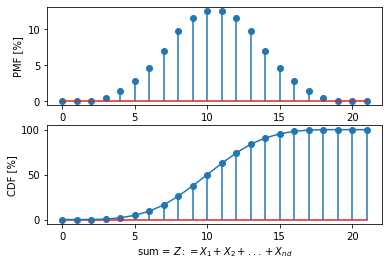



Expectancy: E(Z) = 10.5

Variance: var(Z) = 8.75




,sum=z,PMF: P(Z=z) [%],CDF: P(Z<=z) [%]
0,0,0.000000,0.000000
1,1,0.000000,0.000000
2,2,0.000000,0.000000
3,3,0.462963,0.462963
4,4,1.388889,1.851852
5,5,2.777778,4.629630
6,6,4.629630,9.259259
7,7,6.944444,16.203704
8,8,9.722222,25.925926
9,9,11.574074,37.500000


In [13]:
Dclass.distplot()

__EJERCICIO #3__: __Parte (a)__ calcular la probabilidad tal que la suma de los resultados de los cinco poliedros pitagóricos: tetraedro, cubo, octaedro, dodecaedro, icosaedro (de número de caras 4, 6, 8, 12 y 20 respectivamente) sea menor a 25, es decir calcule $\mathbb{P}( Z < 25)$ donde $Z=X_1+X_2+X_3+X_4+X_5$, siendo $X_i$ para $i=1,2,...,5$ los resultados aleatorios obtenidos de cada dado. __Parte (b)__ Graficar la PMF (función de masa de probabilidad) $\mathbb{P}(Z=z)$ variando $z$ desde 5 hasta 50, graficar la función de distribución cumulativa (CDF) $\mathbb{P}(Z \le z)$, y calcular el valor esperado $\mathbb{E}(Z)$ y la varianza de $Z$.

__Solución__:

Primero creamos una instancia de la clase creada anteriormente __Definedices__ con los siguientes parámetros:

dices_array = [4, 6, 8, 12, 20] 

rule = 'sum<' 

z = 25

N_games = 500000

Llamamos Dclass a dicha instancia:

In [14]:
Dclass = Definedices([4, 6, 8, 12, 20],
               'sum<',25,
               N_games=500000)
Dclass

Dices([4, 6, 8, 12, 20], sum<25)

__resultados Parte (a)__: Para acceder al resumen de los resultados diréctamente se utiliza print(Dclass)

In [15]:
print(Dclass)

The array of dices is [4, 6, 8, 12, 20].
The probability such that
 sum<25 is:

Cartesian product method (deterministic brute force):
Probability = 35.5339%
Elapsed time = 0.0342143 sec

Montecarlo method with N = 500000:
Probability = 35.5602%
Relative deviation = 0.0741429%
Elapsed time = 26.5894 sec


__Resultados Parte (b)__: para resolver esta parte simplemente invocamos el método distplot() a partir de la instancia creada anteriormente para estos dados, es decir:

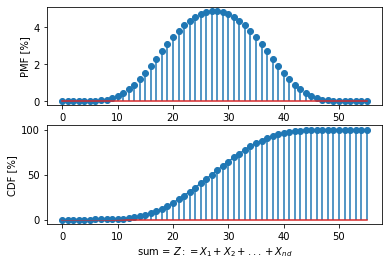



Expectancy: E(Z) = 27.5

Variance: var(Z) = 54.5833




,sum=z,PMF: P(Z=z) [%],CDF: P(Z<=z) [%]
0,0,0.000000,0.000000
1,1,0.000000,0.000000
2,2,0.000000,0.000000
3,3,0.000000,0.000000
4,4,0.000000,0.000000
5,5,0.002170,0.002170
6,6,0.010851,0.013021
7,7,0.032552,0.045573
8,8,0.075955,0.121528
9,9,0.149740,0.271267


In [16]:
Dclass.distplot()

__5. COMPARACIÓN DE AMBOS MÉTODOS: clase $\textbf{Compare_both_methods}$__

Usando esta clase se comparan ambos métodos, el método de Montecarlo con el método del producto cartesiano (que proporciona el valor exacto de la probabilidad de esta clase de problemas). Se comparan los tiempos de ejecución y el error relativo al aplicar el método de Montecarlo. Esta clase tiene los siguientes métodos:

__(1) $\texttt{Compare_both_methods()}$__: el método constructor para crear una instancia de la clase. Tiene los siguientes parámetros:

$\color{blue}{\texttt{Ndices_max}}$  $\color{gray}{\textrm{[int]}}$: Es un número entero que indica el número máximo de dados para efectuar la simulación. Se varía desde 1, 2, 3,... hasta Ndices_max dados.

$\color{blue}{\texttt{Nfaces_dice}}$  $\color{gray}{\textrm{[int]}}$: número de caras de cada dado (valor entero).

$\color{blue}{\texttt{rule}}$  $\color{gray}{\textrm{[str]}}$: la regla con que se va a verificar el resultado de los dados. Es el mismo formato que en la clase __Definedices__ explicada anteriormente.

$\color{blue}{\texttt{z}}$  $\color{gray}{\textrm{[int, function]}}$: parámetro de comparación (ver clase __Definedices__). Puede ser un entero o una función que depende del número de dados. 
Ejemplo 1: calcular la probabilidad de que la suma de los resultados de los dados sea menor que $10$, $\mathbb{P}(\sum_{i=1}^N X_i < 10)$, en este caso se definen rule='sum<' y z=10.

Ejemplo 2: calcular la probabilidad de que la suma de los resultados de los dados sea mayor que $3$ veces el número de dados $N$, $\mathbb{P}(\sum_{i=1}^N X_i > 3N)$, en este caso se definen rule='sum>' y el argumento z es una función lambda:
z = lambda N: (3*N)

$\color{blue}{\texttt{N_games}}$  $\color{gray}{\textrm{[int, float]}}$: es el número de juegos en la simulación de montecarlo. Por defecto es 1000000, pero con 50000 simulaciones pueden producir resultados satisfactorios.

__(2) $\texttt{solve()}$__: una vez creada la instancia, se invoca este método y realiza los cálculos variando el número de dados desde 1 hasta Ndices_max aplicando ambos métodos (producto cartesiano y Montecarlo), calculando las probabilidades y sus tiempos de ejecución. Realiza dos gráficos, el primero es el tiempo de ejecución de cada método como función del número de dados y el segundo gráfico es la probabilidad para que se satisfaga la regla determinada por el par (rule, z) para ambos métodos, también en función del número de dados. Finalmente retorna una tabla pandas.DataFrame que contiene dicha información y el error relativo al aplicar el método de Montecarlo.

In [17]:

"""
clase utilizada para comparar ambos 
métodos. Utiliza la clase Definedices
editada anteriormente y todas sus 
librerías involucradas.
"""

class Compare_both_methods:
    def __init__(self, Ndices_max,
                 Nfaces_dice,
                 rule, z, 
                 N_games=1e6):
        self.Ndices_max = Ndices_max
        self.Nfaces_dice = Nfaces_dice
        self.rule = rule
        self.z = z
        self.N_games = int(N_games)
        self.Ndlist = \
              list(range(1,Ndices_max+1))
        Prob = np.zeros(Ndices_max, 
                            dtype=float)
        self.Prob = Prob
        self.exec_time = np.zeros_like(Prob,
                            dtype=float)
        self.Prob_MC = np.zeros_like(Prob,
                            dtype=float)
        self.exec_time_MC = np.zeros_like(Prob,
                            dtype=float)
        self.PercentRD = np.zeros_like(Prob, dtype=float)


    def __repr__(self):
        if isinstance (self.z,int):
            Zfun = str(self.z)
        else:
            Zfun = 'user_defined_function'

        txt = 'CBMD(Ndices_max={}\nNfaces_dice={}\nrule: {}{}\nN_games={})'.format(
             self.Ndices_max,
             self.Nfaces_dice,             
             self.rule,             
             Zfun,
             self.N_games)
        return txt


    def solve(self):
        Ndlist = self.Ndlist
        Nfaces_dice = self.Nfaces_dice
        rule = self.rule
        z = self.z
        N_games = self.N_games

        for Ndices in Ndlist:
            if isinstance(z, int):
                Zfun = z
            else:
                Zfun = z(Ndices)

            Dclass = Definedices(
               Ndices*[Nfaces_dice],
               rule, Zfun, N_games)
            self.Prob[Ndices-1], \
            self.exec_time[Ndices-1] = \
            Dclass.throw_dices()

            self.Prob_MC[Ndices-1], \
            self.exec_time_MC[Ndices-1] = \
            Dclass.throw_dices_MC()

        tmean_MC = np.mean(self.exec_time_MC)
        self.tmean_MC = Dclass.round_by_sig_digits(tmean_MC,                            
                        n=4)
        self.tstd_MC = np.std(self.exec_time_MC)
        self.PercentRD = 100*np.abs(self.Prob_MC - self.Prob)/self.Prob
        DF = pd.DataFrame({             'Ndices':Ndlist,            
             'Time CP [sec]': self.exec_time,
             'Time MC [sec]': self.exec_time_MC,
             't_MC/t_CP': self.exec_time_MC/self.exec_time,
             'Prob (exact)':self.Prob,
             'Prob (MC)':self.Prob_MC,
             'Rel. Deviation MC [%]':self.PercentRD
                      })     
        self.plot()   
        return DF


    def plot(self):
        Ndlist = self.Ndlist
        Prob = self.Prob
        exec_time = self.exec_time
        Prob_MC = self.Prob_MC
        exec_time_MC = self.exec_time_MC
        plt.subplot(2,1,1)
        plt.plot(Ndlist, exec_time, 'k-')
        plt.plot(Ndlist, exec_time_MC, 'r--')
        plt.ylabel('exec. Time [sec]')
        plt.yscale('log')
        plt.legend(['Cartesian product',
            'Montecarlo'])
        
        txt = 't = {} sec'.format(self.tmean_MC)
        plt.text(1,0.3*self.tmean_MC,txt)

        plt.subplot(2,1,2)
        plt.plot(Ndlist, Prob, 'k-')
        plt.plot(Ndlist, Prob_MC, 'r--')
        plt.legend(['Cartesian product',
                    'Montecarlo'])
        plt.ylabel('Probability')

        plt.xlabel('N dices of {} faces'.\
                format(self.Nfaces_dice))
        plt.show()

__EJERCICIO #4__: Compare los métodos de Montecarlo y producto cartesiano variando el número de dados $N$ desde 1 hasta Ndices_max=10 con dados convencionales de 6 caras enumeradas del 1 al 6. Calcular la probabilidad tal que la suma de los resultados de todos los $N$ dados sea mayor o igual a $3N$, i.e. $\mathbb{P}(\sum_{i=1}^N X_i \ge 3N)$. El número de simulaciones de Montecarlo es N_games=50000. Calcule el tiempo de ejecución de ambos métodos y analice los resultados.

__Solución:__

Primero se crea una instancia de la clase __Compare_both_methods__ con los siguientes valores para los argumentos:

Ndices_max=10

Nfaces_dice=6

rule='sum>='

z=lambda N: 3*N

N_games=50000

La instancia la llamamos CBMDclass:

In [18]:
CBMDclass = Compare_both_methods(
              Ndices_max=10,
              Nfaces_dice=6,
              rule='sum>=',
              z=lambda Ndices: 3*Ndices,
              N_games = 50000)
CBMDclass

CBMD(Ndices_max=10
Nfaces_dice=6
rule: sum>=user_defined_function
N_games=50000)

__Resultados:__

Los resultados se acceden invocando el método solve(), es decir

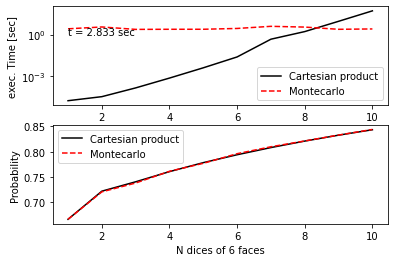

,Ndices,Time CP [sec],Time MC [sec],t_MC/t_CP,Prob (exact),Prob (MC),Rel. Deviation MC [%]
0,1,0.000018,2.594518,141327.246753,0.666667,0.66674,0.011000
1,2,0.000036,3.514717,98278.606667,0.722222,0.72086,0.188615
2,3,0.000152,2.359884,15538.572998,0.740741,0.73832,0.326800
3,4,0.000768,2.402726,3129.739752,0.760802,0.76146,0.086426
4,5,0.004179,2.410290,576.729306,0.778549,0.77722,0.170751
5,6,0.025074,2.754247,109.842636,0.794153,0.79622,0.260284
6,7,0.468393,3.909263,8.346124,0.808299,0.80990,0.198065
7,8,1.642471,3.451525,2.101422,0.821117,0.82136,0.029540
8,9,8.954206,2.392078,0.267146,0.832801,0.83298,0.021509
9,10,50.196725,2.539279,0.050587,0.843496,0.84406,0.066848


In [19]:
CBMDclass.solve()

__Análisis de los resultados del Ejercicio 4:__

A partir de los valores del tiempo de ejecución para ambos métodos presentados en el gráfico anterior y la tabla pandas.DataFrame, se concluye que calcular la probabilidad usando todas las combinaciones del producto cartesiano tiene tiempo exponencial (complejidad exponencial en tiempo y memoria) ya que crece rápidamente a medida que se incrementa el número de dados $N$, de hecho esto se observa en el gráfico porque tiene una función creciente en escala logarítmica. Por otro lado, el método de Montecarlo tiene la ventaja que tiene un tiempo de ejecución aproximadamente constante entre 2 y 4 segundos en promedio, así que es independiente del número de dados $N$. Para $N<4$, el método del producto cartesiano (CP) es entre 10000-100000 veces más rápido que el método de Montecarlo (MC), sin embargo para $N=9$, el método MC es 4 veces más rápido que el método CP y para $N=10$ el método MC es 20 veces más rápido que el método MC. En este caso se recomienda utilizar el método CP para $N \le 8$ y el método MC para $N>8$. El método de MC, a pesar de calcular la probabilidad aleatoriamente, se tiene un error relativo en valores entre 0.1-1% (respecto al valor exacto proporcionado por el método CP), así que N_games=50000 produce resultados bastante satisfactorios con una pérdida despreciable de precisión.

__6. REFERENCIAS:__

[1] Finkel, Irving (2008). "Board Games" . Beyond Babylon: Art, Trade, and Diplomacy in the Second Millennium B.C. Metropolitan Museum of Art. p. 151. ISBN 978-1-58839-295-4

[2] https://digitalambler.com/2013/05/06/dice-divination/

[3] Courant, Richard; Robbins, Herbert; Stewart, Ian (1996). What is Mathematics? An Elementary Approach to Ideas and Methods, Second Edition. Oxford University Press. pp. 236-240. ISBN 0-19-510519-2

[4] Responder a Se lanzan 3 dados simultáneamente. ¿Cuál es la probabilidad de que la suma obtenida de los resultados sea un múltiplo de 3? de Simon Graffe https://es.quora.com/Se-lanzan-3-dados-simult%C3%A1neamente-Cu%C3%A1l-es-la-probabilidad-de-que-la-suma-obtenida-de-los-resultados-sea-un-m%C3%BAltiplo-de-3/answer/Simon-Graffe?ch=15&oid=404862792&share=d3addc90&srid=uS8BBs&target_type=answer

[5] https://docs.python.org/3/library/itertools.html

[6] https://www.tutorialspoint.com/python-program-to-find-cartesian-product-of-two-lists#